# Part 4

----------

### Visualisation of the data to illustrate the findings and conclusions derived from the preceding steps.

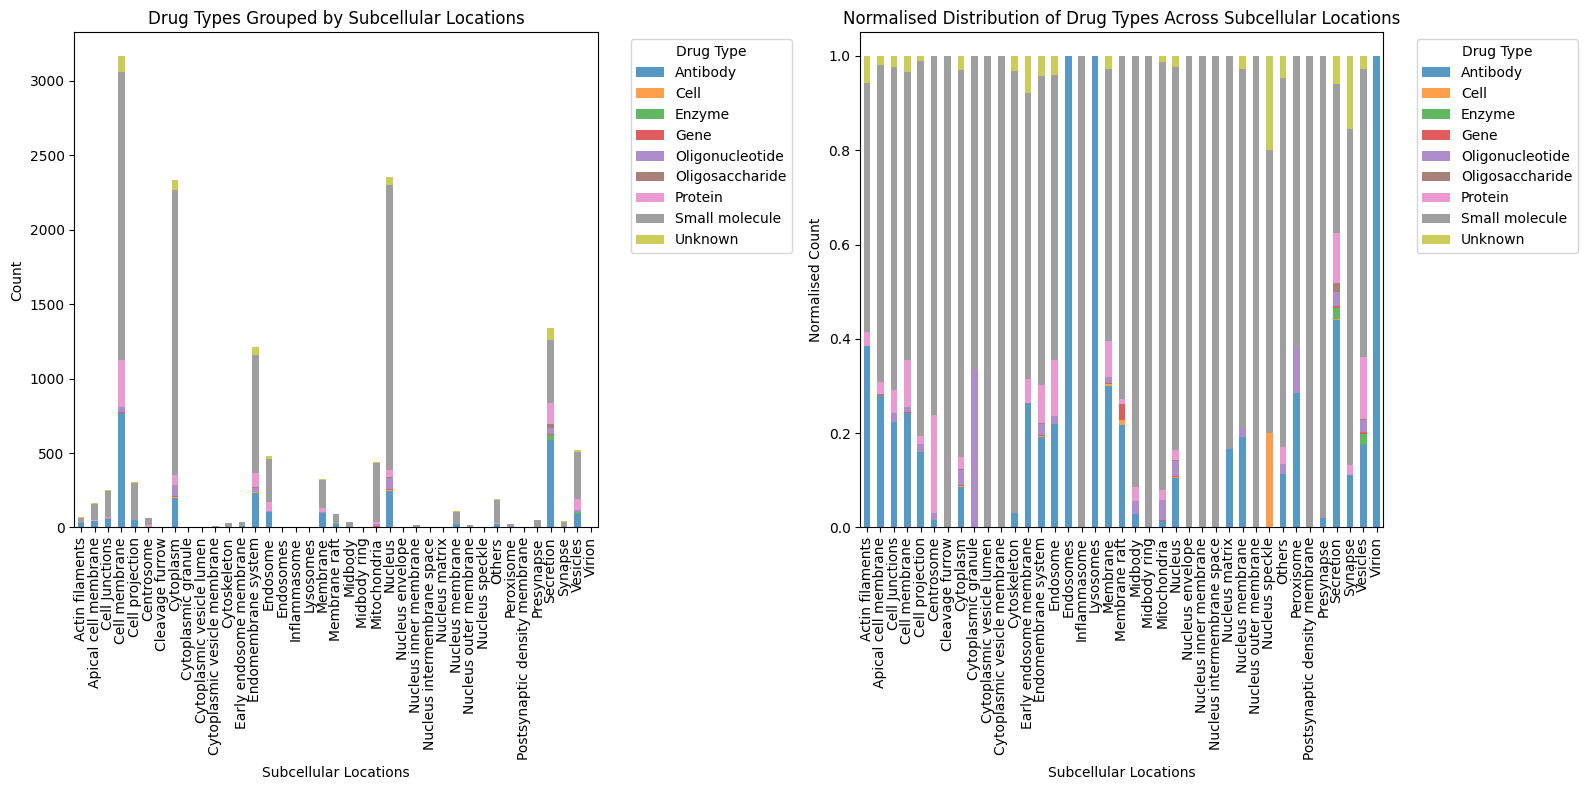

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

tally_df = pd.read_csv('3_Cleaned_Data_Grouped.csv')

pivot_df = tally_df.pivot(index='subcellularLocations', columns='drugType', values='count')

plt.figure(figsize=(16, 8))

# plot standard data
plt.subplot(1, 2, 1)
pivot_df.plot(kind='bar', stacked=True, alpha=0.75, ax=plt.gca())
plt.title('Drug Types Grouped by Subcellular Locations')
plt.xlabel('Subcellular Locations')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='center')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')

tally_df = pd.read_csv('3_Cleaned_Data_Grouped.csv')

total_counts = tally_df.groupby('subcellularLocations')['count'].sum()

# merge the total counts with the original df
tally_df = tally_df.merge(total_counts, on='subcellularLocations', suffixes=('', '_total'))

# normalise the counts by dividing each count by the total count for its respective subcellular location
tally_df['normalized_count'] = tally_df['count'] / tally_df['count_total']

# pivot table for normalised data
pivot_df = tally_df.pivot(index='subcellularLocations', columns='drugType', values='normalized_count')

# plot a second normalised version of the chart for better representation of significant differences between drug types and subcellular locations
plt.subplot(1, 2, 2)
pivot_df.plot(kind='bar', stacked=True, alpha=0.75, ax=plt.gca())
plt.title('Normalised Distribution of Drug Types Across Subcellular Locations')
plt.xlabel('Subcellular Locations')
plt.ylabel('Normalised Count')
plt.xticks(rotation=90, ha='center')
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


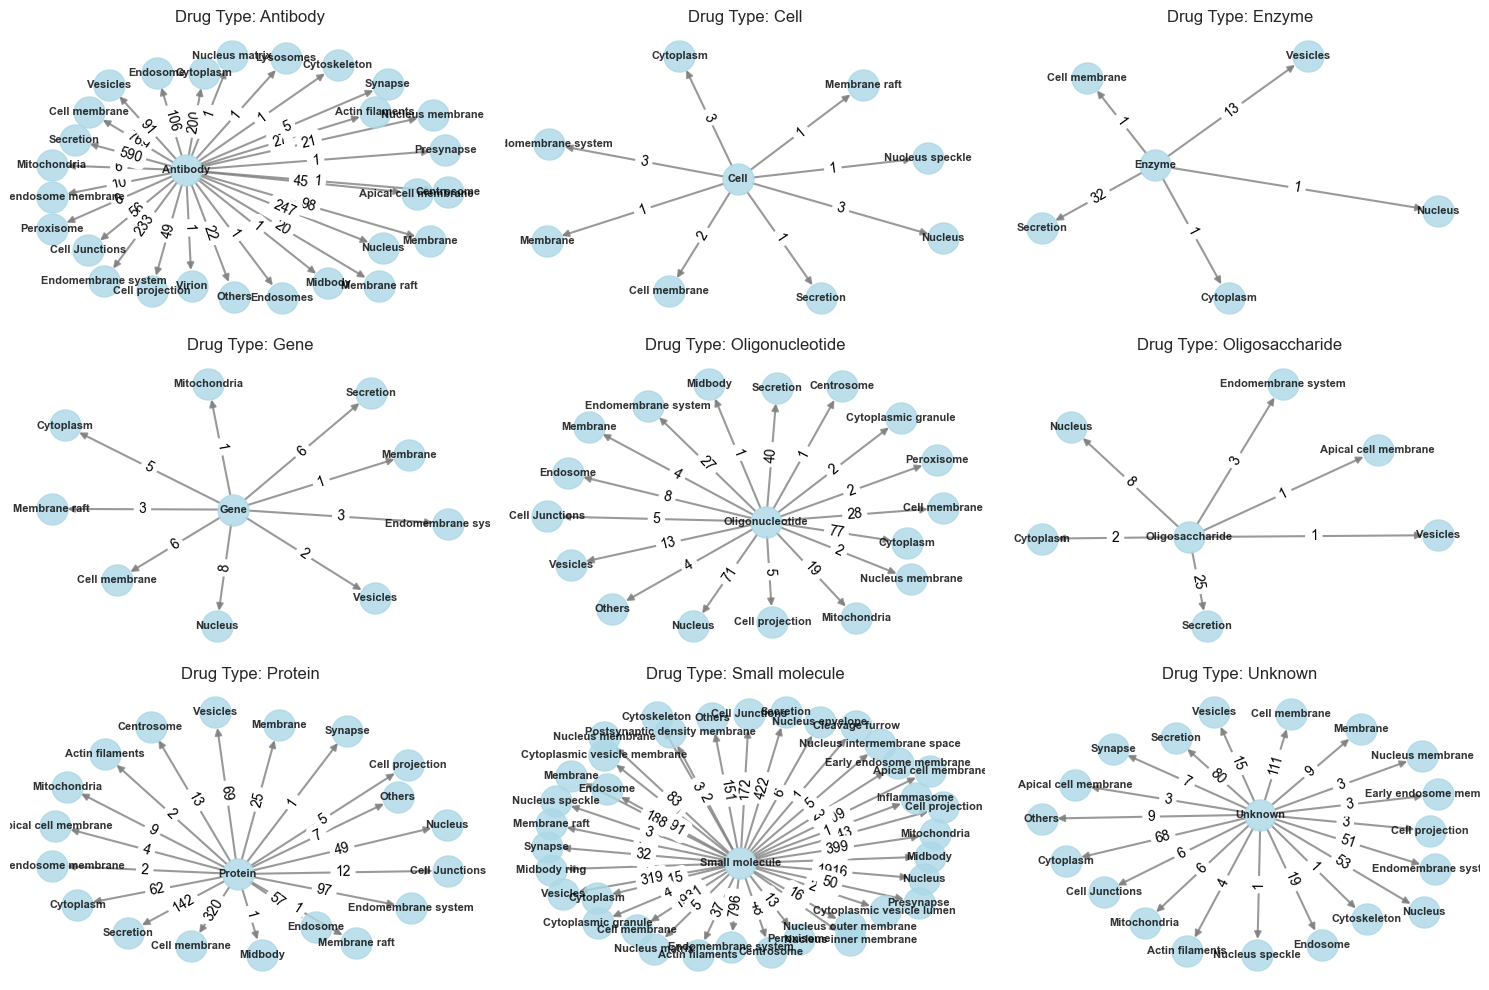

In [30]:
# networkx graphs can be great for visualising the relationships between different drug types and their distribution across various subcellular locations, allowing us to identify patterns, clusters, and dependencies in the data.
# most of the code was modified from template which can be found on the networkx docs
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_edge_colormap.html#sphx-glr-auto-examples-drawing-plot-edge-colormap-py

import networkx as nx

tally_df = pd.read_csv('3_Cleaned_Data_Grouped.csv')

unique_drug_types = tally_df['drugType'].unique()

num_plots = len(unique_drug_types)
num_rows = (num_plots - 1) // 3 + 1

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10))

if num_rows == 1:
    axes = axes.reshape(1, -1)

# create individual network graphs for each drug type
for idx, drug_type in enumerate(unique_drug_types):
    drug_df = tally_df[tally_df['drugType'] == drug_type]
    
    G = nx.DiGraph()

    # adding nodes
    for location in drug_df['subcellularLocations'].unique():
        G.add_node(location, type='location')
        
    G.add_node(drug_type, type='drug')
    
    for _, row in drug_df.iterrows():
        G.add_edge(drug_type, row['subcellularLocations'], weight=row['count'])

    ax = axes[idx // 3, idx % 3]
    pos = nx.spring_layout(G)
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', width=1.5, edge_color='gray', alpha=0.8)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    ax.set_title(f'Drug Type: {drug_type}')

plt.tight_layout()
plt.show()

### The proximity of drug type nodes to subcellular location nodes signifies a stronger relationship or connection between them. For example, antibody modality drugs are generally observed to have a higher affinity for cell membrane/secretory subcellular organelles and less affinity for midbody/endosomes. These relationships can also be quantitatively observed in the values between pointers.

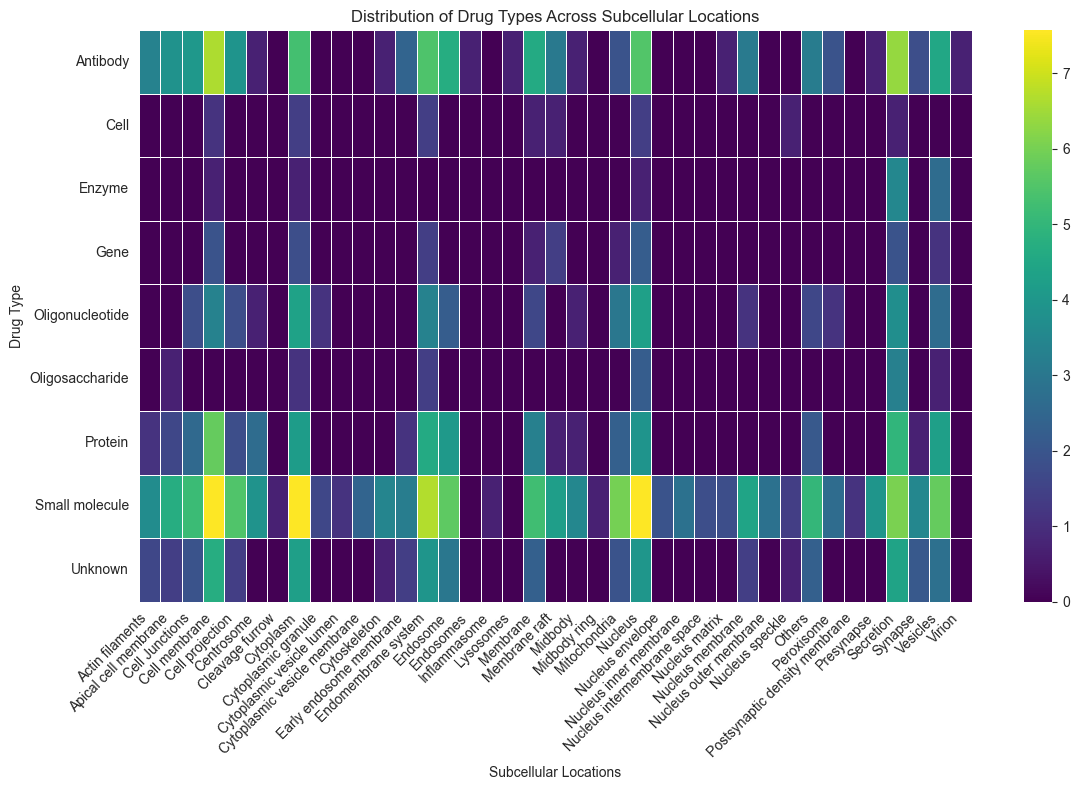

In [52]:
# using logarithmic normalisation for a seaborn colormap to highlight patterns among drug types and their actions within subcellular locations across the whole dataset.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tally_df = pd.read_csv('3_Cleaned_Data_Grouped.csv')

pivot_df = tally_df.pivot(index='drugType', columns='subcellularLocations', values='count')

pivot_df.fillna(0, inplace=True)

# logarithmic normalisation
pivot_df_log = np.log1p(pivot_df)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df_log, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Distribution of Drug Types Across Subcellular Locations')
plt.xlabel('Subcellular Locations')
plt.ylabel('Drug Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

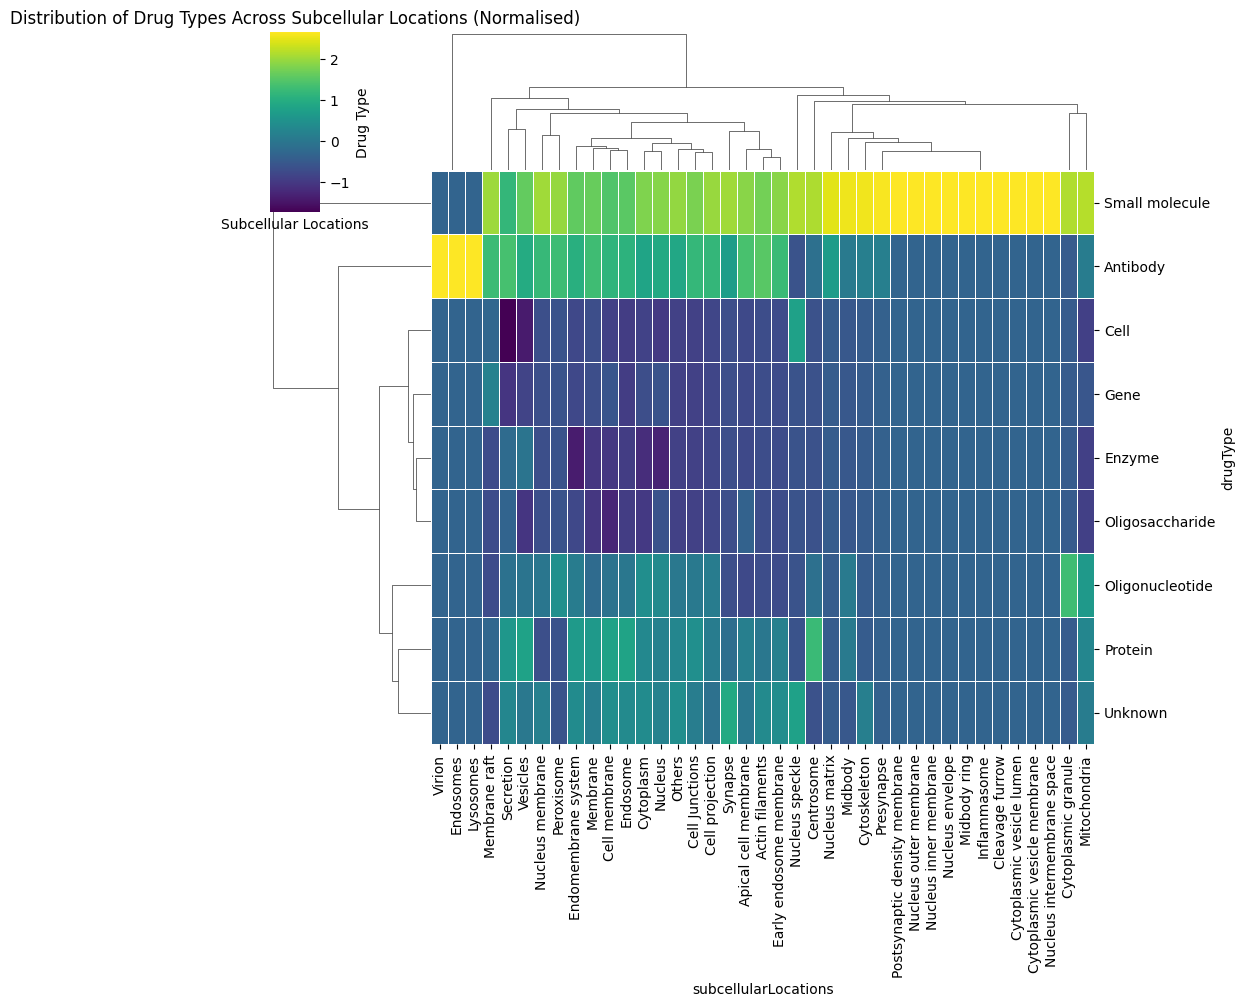

In [7]:
# visualise this in a more structured way to group similarities and visualise relationships within the datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tally_df = pd.read_csv('3_Cleaned_Data_Grouped.csv')

# pivot df
pivot_df = tally_df.pivot(index='drugType', columns='subcellularLocations', values='count')
pivot_df.fillna(0, inplace=True)

# Apply log transformation (emphasise abnormalities and smaller values due to unballanced dataset)
pivot_df_log = np.log1p(pivot_df)

# Z-score normalisation
normalized_pivot_df = (pivot_df_log - pivot_df_log.mean()) / pivot_df_log.std()

# clustered heatmap
plt.figure(figsize=(12, 8))
sns.clustermap(normalized_pivot_df, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Distribution of Drug Types Across Subcellular Locations (Normalised)')
plt.xlabel('Subcellular Locations')
plt.ylabel('Drug Type')
plt.show()


-------------

#### To conclude, our analysis of the Open Targets datasets shed light on how different drug types behave across various subcellular locations. By merging the datasets and visualising the data, we uncovered significant patterns and differences in their distribution, providing valuable insights into drug-target interactions.

#### Feel free to use/modify this framework for any of your own needs.

----------